In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the sample parameter values
parameters = {
    'lambda': np.array([0.7, 0.6, 0.5, 0.8, 0.7]),
    'rho': np.array([0.2, 0.3, 0.4, 0.2, 0.3]),
    'alpha': np.array([50, 45, 40, 60, 55]),
    'beta': np.array([20, 25, 30, 15, 25]),
    'C': np.array([10, 12, 14, 8, 11])
}

# Define the utility function
def utility(x, parameters):
    lambda_val = parameters['lambda']
    rho_val = parameters['rho']
    alpha_val = parameters['alpha']
    beta_val = parameters['beta']
    C_val = parameters['C']

    U = np.sum(x * (1 - x) * (lambda_val * alpha_val - rho_val * beta_val - C_val))
    return -U  # Minimize the negative of the utility function

# Initial guess for the x values
x0 = np.ones(5) * 0.5  # Start with all x values set to 0.5

# Bounds for x values (0 ≤ x_i ≤ 1)
bounds = [(0, 1) for _ in range(5)]

# Perform the optimization
result = minimize(utility, x0, args=(parameters,), bounds=bounds, method='SLSQP')

# Display the result
if result.success:
    print(f"Optimal x values: {result.x}")
    print(f"Maximum Utility: {-result.fun}")
else:
    print("Optimization did not converge.")


Optimal x values: [0.5 0.5 0.5 0.5 0.5]
Maximum Utility: 19.875


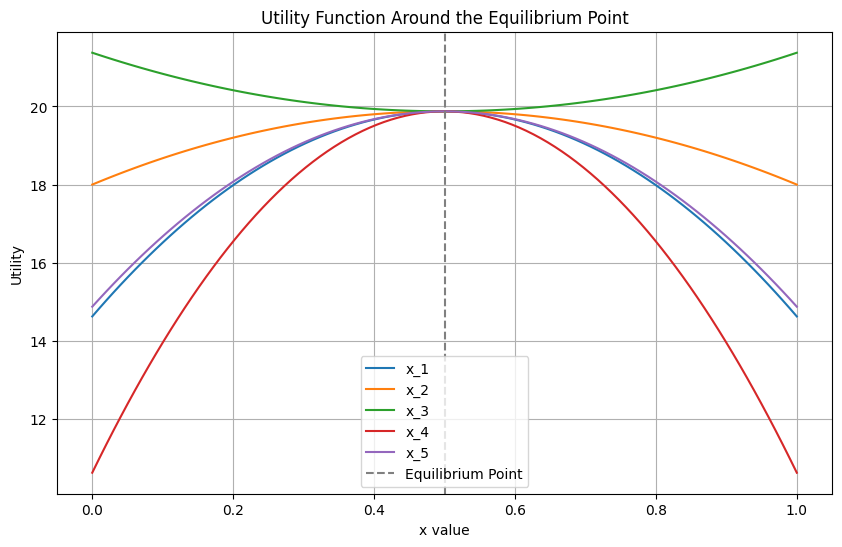

In [ ]:
import matplotlib.pyplot as plt

# Function to calculate utility for a specific index of x (holding others constant)
def utility_single_x(x_i, index, x_values, parameters):
    x = np.copy(x_values)
    x[index] = x_i
    return -utility(x, parameters)

# Plot the utility around the equilibrium point for each x_i
x_values = result.x
x_range = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

for i in range(5):
    utility_vals = [utility_single_x(x_i, i, x_values, parameters) for x_i in x_range]
    plt.plot(x_range, utility_vals, label=f'x_{i+1}')

plt.axvline(0.5, color='gray', linestyle='--', label='Equilibrium Point')
plt.title('Utility Function Around the Equilibrium Point')
plt.xlabel('x value')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)
plt.show()
